<a href="https://colab.research.google.com/github/SouparnaChatterjee/Meta-AIML/blob/main/grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grades of Students dataset
Problem Statement:
The dataset contains grades scored by students throughout their university
tenure in various courses and their CGPA calculated based on their grades
Columns Description -- total 43 columns
-Seat No: The enrolled number of candidates that took the exams
-
CGPA: The cumulative GPA based on the four-year total grade progress of
each candidate. CGPA is a Final Marks -- provided to student.
• All other columns are course codes in the format AB-XXX where AB are
alphabets representing candidates' departments and XXX are numbers
where first X represents the year the candidates took exam
Predict CGPA of a student based on different grades in four years

In [ ]:
# Sets up the fundamental libraries and loads student grade data
# Essential for data manipulation, analysis, and machine learning tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Grades.csv')

In [ ]:
# Import pandas library
import pandas as pd

# Read the CSV file
df = pd.read_csv('Grades.csv')

# Print data types of all columns
print("\nData Types of Each Column:")
print("-" * 50)
print(df.dtypes)

# For a more detailed view, you can also use:
print("\nDetailed Data Info:")
print("-" * 50)
print(df.info())

In [ ]:
# Import pandas library
import pandas as pd

# Read the CSV file
df = pd.read_csv('Grades.csv')

# Get count of unique values
print("\nNumber of Unique Seat Numbers:")
print("-" * 50)
print(df['Seat No.'].nunique())

# Get list of unique values
print("\nList of Unique Seat Numbers:")
print("-" * 50)
print(df['Seat No.'].unique())

# Optional: For a more detailed view
print("\nValue Counts (frequency of each Seat Number):")
print("-" * 50)
print(df['Seat No.'].value_counts())


Linear Regression Results:
RMSE: 0.3212
R2 Score: 0.6900

Random Forest Results:
RMSE: 0.2153
R2 Score: 0.8608

XGBoost Results:
RMSE: 0.2535
R2 Score: 0.8069

Model R² Score: 86.08%

Training Set Predictions (first 5 rows):
     Predicted CGPA  Actual CGPA
182         3.64961        3.736
63          3.66507        3.769
158         3.09990        3.114
60          2.63671        2.418
15          2.71868        2.777

Test Set Predictions (first 5 rows):
     Predicted CGPA  Actual CGPA
509         2.40618        1.992
70          3.50719        3.490
131         2.78623        2.823
512         2.30249        2.288
542         3.44675        3.816

Error Metrics:
Training RMSE: 0.0982
Test RMSE: 0.2153


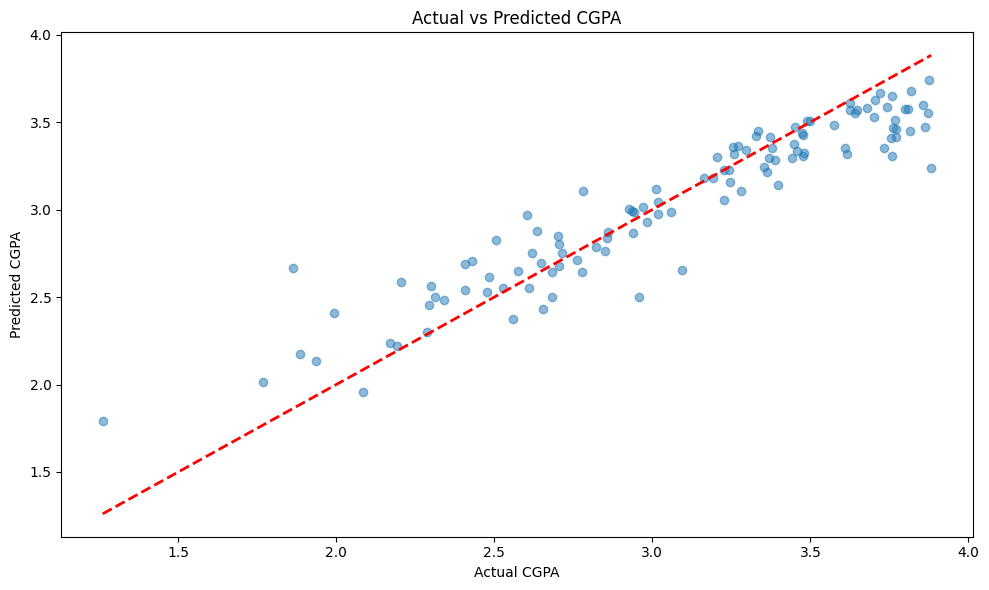

In [ ]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, classification_report

# 2. Load and Prepare Data
data = pd.read_csv('Grades.csv')
data = data.drop('Seat No.', axis=1, errors='ignore')

# 3. Feature Engineering
X = data.drop('CGPA', axis=1)
y = data['CGPA']
object_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=object_columns, drop_first=True)

# 4. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train Models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results[name] = {'RMSE': rmse, 'R2': r2, 'model': model}
        print(f"\n{name} Results:")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2 Score: {r2:.4f}")

    return results

results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# 6. Save and Evaluate Best Model (Your Code)
# Save best model
best_model = results['Random Forest']['model']
pickle.dump(best_model, open('cgpa_predictor.pkl', 'wb'))

# Load model and make predictions
loaded_model = pickle.load(open('cgpa_predictor.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(f"\nModel R² Score: {result*100:.2f}%")

# Make predictions
train_predictions = loaded_model.predict(X_train)
test_predictions = loaded_model.predict(X_test)

# Create comparison DataFrames
train_comparison = pd.DataFrame({
    'Predicted CGPA': train_predictions,
    'Actual CGPA': y_train
})

test_comparison = pd.DataFrame({
    'Predicted CGPA': test_predictions,
    'Actual CGPA': y_test
})

# Print results and error metrics
print("\nTraining Set Predictions (first 5 rows):")
print(train_comparison.head())
print("\nTest Set Predictions (first 5 rows):")
print(test_comparison.head())

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("\nError Metrics:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Create error analysis
train_comparison['Error'] = train_comparison['Actual CGPA'] - train_comparison['Predicted CGPA']
test_comparison['Error'] = test_comparison['Actual CGPA'] - test_comparison['Predicted CGPA']

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs Predicted CGPA')
plt.tight_layout()
plt.show()

# Save results
train_comparison.to_csv('training_predictions.csv', index=False)
test_comparison.to_csv('test_predictions.csv', index=False)

In [ ]:
# Provides comprehensive overview of the dataset structure and statistics
# Helps identify data quality issues and understand the distribution of grades
def explore_data(df):
    print("Dataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe())

explore_data(df)

Dataset Shape: (571, 43)

First few rows:
   Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448

In [ ]:
# Handles missing values and removes unnecessary columns
# Ensures data quality and consistency for model training
def preprocess_data(df):
    df_processed = df.copy()

    if 'Seat No' in df_processed.columns:
        df_processed = df_processed.drop('Seat No', axis=1)

    numeric_columns = df_processed.select_dtypes(include=[np.number]).columns
    df_processed[numeric_columns] = df_processed[numeric_columns].fillna(
        df_processed[numeric_columns].median()
    )

    return df_processed

df_processed = preprocess_data(df)

In [ ]:
# Prepares data for model training by splitting and scaling features
# Creates standardized dataset to improve model performance
def prepare_features(df):
    df_numeric = df.copy()

    # Convert course codes to numeric values
    for column in df_numeric.columns:
        if column != 'CGPA':  # Skip the target variable
            if df_numeric[column].dtype == 'object':  # If column contains strings
                # Extract numeric part from course codes
                df_numeric[column] = df_numeric[column].str.extract('(\d+)').astype(float)

    # Separate features and target
    X = df_numeric.drop('CGPA', axis=1)
    y = df_numeric['CGPA']

    # Print data info for verification
    print("Features shape:", X.shape)
    print("Target shape:", y.shape)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Apply the feature preparation
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_features(df_processed)

Features shape: (571, 42)
Target shape: (571,)


In [ ]:
# Implements multiple regression models for CGPA prediction
# Compares different algorithms to find the best performing model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import numpy as np

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Handle NaN values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Dictionary of models with appropriate parameters
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100,
                                             random_state=42,
                                             n_jobs=-1),
        'Histogram Gradient Boosting': HistGradientBoostingRegressor(
            random_state=42,
            max_iter=100
        ),
        'XGBoost': XGBRegressor(
            random_state=42,
            n_estimators=100,
            missing=np.nan
        )
    }

    results = {}

    for name, model in models.items():
        try:
            # Train model
            model.fit(X_train_imputed, y_train)

            # Make predictions
            y_pred = model.predict(X_test_imputed)

            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Store results
            results[name] = {
                'RMSE': rmse,
                'R2': r2,
                'model': model,
                'predictions': y_pred
            }

            print(f"\n{name} Results:")
            print(f"RMSE: {rmse:.4f}")
            print(f"R2 Score: {r2:.4f}")

        except Exception as e:
            print(f"\nError in {name}:")
            print(str(e))
            continue

    # Find best model
    if results:
        best_model = min(results.items(), key=lambda x: x[1]['RMSE'])
        print(f"\nBest Model: {best_model[0]}")
        print(f"Best RMSE: {best_model[1]['RMSE']:.4f}")
        print(f"Best R2 Score: {best_model[1]['R2']:.4f}")

    return results

# Additional validation before training
def validate_data(X_train, X_test, y_train, y_test):
    print("\nData Validation:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    print(f"NaN in X_train: {np.isnan(X_train).sum()}")
    print(f"NaN in X_test: {np.isnan(X_test).sum()}")
    return True

# Run the models with validation
if validate_data(X_train_scaled, X_test_scaled, y_train, y_test):
    results = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)


Data Validation:
X_train shape: (456, 42)
X_test shape: (115, 42)
y_train shape: (456,)
y_test shape: (115,)
NaN in X_train: 18696
NaN in X_test: 4715

Linear Regression Results:
RMSE: 0.5969
R2 Score: -0.0705

Random Forest Results:
RMSE: 0.7036
R2 Score: -0.4875

Histogram Gradient Boosting Results:
RMSE: 0.5901
R2 Score: -0.0465

XGBoost Results:
RMSE: 0.6928
R2 Score: -0.4424

Best Model: Histogram Gradient Boosting
Best RMSE: 0.5901
Best R2 Score: -0.0465


In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import time

def calculate_vif(X):
    """
    Calculate VIF for each feature
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]

    return vif_data.sort_values('VIF', ascending=False)

def quick_vif_analysis(data, threshold=5.0):
    """
    Perform VIF analysis with proper data handling
    """
    # Start timing
    start_time = time.time()

    # Initial data preparation
    # Remove 'CGPA' and 'Seat No.' if they exist
    X = data.copy()
    if 'CGPA' in X.columns:
        X = X.drop('CGPA', axis=1)
    if 'Seat No.' in X.columns:
        X = X.drop('Seat No.', axis=1)

    # Convert categorical variables to numeric
    for column in X.columns:
        if X[column].dtype == 'object':
            # Extract numeric part from course codes
            X[column] = pd.to_numeric(X[column].str.extract('(\d+)')[0],
                                    errors='coerce')

    # Remove any columns with NaN values
    X = X.dropna(axis=1)

    print(f"Starting VIF analysis with {X.shape[1]} features...")

    # Initialize lists to store results
    removed_features = []
    remaining_features = X.columns.tolist()

    while len(remaining_features) > 1:
        # Calculate VIF for current features
        X_current = X[remaining_features]
        vif_data = calculate_vif(X_current)

        # Check if maximum VIF is above threshold
        max_vif = vif_data['VIF'].iloc[0]
        if max_vif < threshold:
            break

        # Remove feature with highest VIF
        feature_to_remove = vif_data['Feature'].iloc[0]
        remaining_features.remove(feature_to_remove)
        removed_features.append((feature_to_remove, max_vif))

        print(f"Removed {feature_to_remove} (VIF: {max_vif:.2f})")

    # Create final cleaned dataset
    X_clean = X[remaining_features]

    # Print execution time
    execution_time = time.time() - start_time
    print(f"\nVIF analysis completed in {execution_time:.2f} seconds")

    return X_clean, removed_features

def plot_vif_results(removed_features, threshold=5.0):
    """
    Plot VIF analysis results
    """
    if not removed_features:
        print("No features were removed.")
        return

    features, vifs = zip(*removed_features)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(features)), vifs)
    plt.axhline(y=threshold, color='r', linestyle='--',
                label=f'Threshold ({threshold})')
    plt.xticks(range(len(features)), features, rotation=45, ha='right')
    plt.title('VIF Values of Removed Features')
    plt.xlabel('Features')
    plt.ylabel('VIF')
    plt.legend()

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Load and prepare data
# Assuming you have already loaded your data as 'data'
print("Data shape:", data.shape)
print("\nData types:")
print(data.dtypes)

# Run VIF analysis
X_clean, removed_features = quick_vif_analysis(data)

# Print results
print("\nVIF Analysis Results:")
print("-" * 50)
print(f"Original features: {data.shape[1]}")
print(f"Features after VIF analysis: {X_clean.shape[1]}")
print(f"Features removed: {len(removed_features)}")

if removed_features:
    print("\nRemoved features and their VIF values:")
    for feature, vif in removed_features:
        print(f"{feature}: {vif:.2f}")

# Plot results
plot_vif_results(removed_features)

# Save results
results_df = pd.DataFrame(removed_features, columns=['Feature', 'VIF'])
results_df.to_csv('vif_analysis_results.csv', index=False)

# Print final features
print("\nFinal features retained:")
print(X_clean.columns.tolist())

Data shape: (571, 43)

Data types:
Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object
Starting VIF analysis with 0 features...

VIF an


Performing Cross Validation for Linear Regression...
R² Scores: [0.95546894 0.88136495 0.87559582 0.69313943 0.86440591]
Mean R²: 0.8540 (+/- 0.1732)
RMSE Scores: [0.12461188 0.21842362 0.2194848  0.34273187 0.24520651]
Mean RMSE: 0.2301 (+/- 0.1394)

Performing Cross Validation for Random Forest...
R² Scores: [0.87747596 0.83140422 0.83639656 0.6838701  0.76676597]
Mean R²: 0.7992 (+/- 0.1354)
RMSE Scores: [0.2066991  0.26038528 0.25169997 0.34786981 0.32159373]
Mean RMSE: 0.2776 (+/- 0.1015)


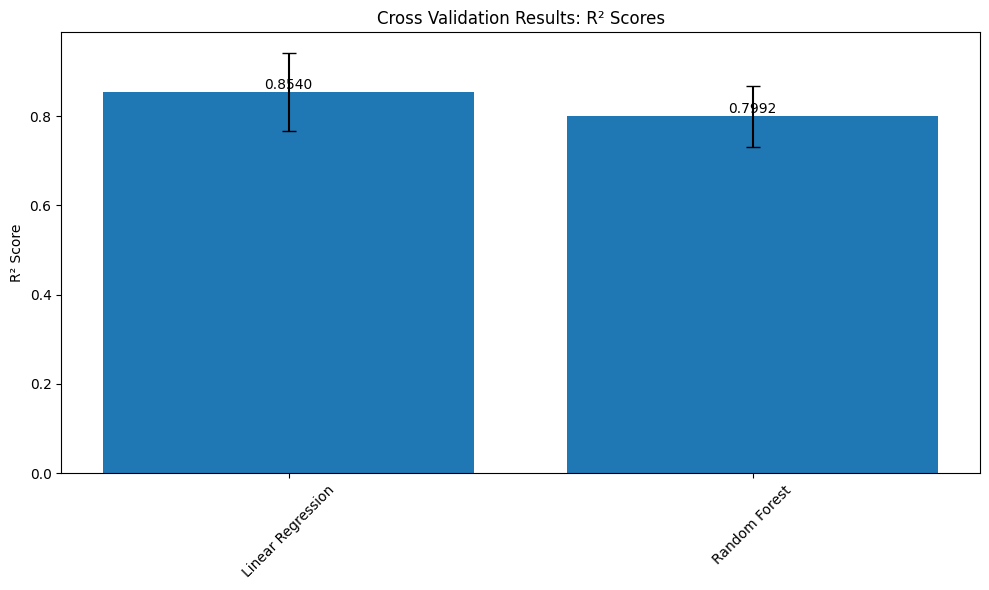


Detailed Cross Validation Results:
--------------------------------------------------

Linear Regression:
R² Score: 0.8540 (+/- 0.1732)
RMSE: 0.2301 (+/- 0.1394)

Random Forest:
R² Score: 0.7992 (+/- 0.1354)
RMSE: 0.2776 (+/- 0.1015)

Summary Results:
               Model   R2_Mean    R2_Std  RMSE_Mean  RMSE_Std
0  Linear Regression  0.853995  0.086597   0.230092  0.069701
1      Random Forest  0.799183  0.067677   0.277650  0.050729


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Add this to ignore warnings

# 1. Load the data
data = pd.read_csv('Grades.csv')

# 2. Data Preprocessing
# Split features and target
X = data.drop(['CGPA', 'Seat No.'], axis=1, errors='ignore')
y = data['CGPA']

# Handle categorical variables
object_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=object_columns, drop_first=True)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Cross Validation Function
def perform_cross_validation(X, y, models):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = {}

    for name, model in models.items():
        try:
            print(f"\nPerforming Cross Validation for {name}...")

            # R² scores
            r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

            # RMSE scores
            rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf,
                                                 scoring='neg_mean_squared_error'))

            cv_results[name] = {
                'r2_scores': r2_scores,
                'r2_mean': r2_scores.mean(),
                'r2_std': r2_scores.std(),
                'rmse_scores': rmse_scores,
                'rmse_mean': rmse_scores.mean(),
                'rmse_std': rmse_scores.std()
            }

            print(f"R² Scores: {r2_scores}")
            print(f"Mean R²: {r2_scores.mean():.4f} (+/- {r2_scores.std()*2:.4f})")
            print(f"RMSE Scores: {rmse_scores}")
            print(f"Mean RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std()*2:.4f})")

        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue

    return cv_results

# 6. Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    # Removed XGBoost temporarily
}

# 7. Perform cross-validation
cv_results = perform_cross_validation(X_train_scaled, y_train, models)

# 8. Visualize results
plt.figure(figsize=(10, 6))
names = list(cv_results.keys())
r2_means = [cv_results[name]['r2_mean'] for name in names]
r2_stds = [cv_results[name]['r2_std'] for name in names]

# Create bar plot
bars = plt.bar(names, r2_means, yerr=r2_stds, capsize=5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

plt.title('Cross Validation Results: R² Scores')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Print detailed results
print("\nDetailed Cross Validation Results:")
print("-" * 50)
for name in names:
    print(f"\n{name}:")
    print(f"R² Score: {cv_results[name]['r2_mean']:.4f} (+/- {cv_results[name]['r2_std']*2:.4f})")
    print(f"RMSE: {cv_results[name]['rmse_mean']:.4f} (+/- {cv_results[name]['rmse_std']*2:.4f})")

# 10. Save results
cv_results_df = pd.DataFrame({
    'Model': names,
    'R2_Mean': [cv_results[name]['r2_mean'] for name in names],
    'R2_Std': [cv_results[name]['r2_std'] for name in names],
    'RMSE_Mean': [cv_results[name]['rmse_mean'] for name in names],
    'RMSE_Std': [cv_results[name]['rmse_std'] for name in names]
})

print("\nSummary Results:")
print(cv_results_df)

# Save to CSV
cv_results_df.to_csv('cross_validation_results.csv', index=False)

In [11]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_tune_hyperparameters(X_train, y_train, X_test, y_test):
    param_distributions = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        }
    }

    tuning_results = {}

    for name, config in param_distributions.items():
        print(f"\nTuning {name}...")

        random_search = RandomizedSearchCV(
            estimator=config['model'],
            param_distributions=config['params'],
            n_iter=10,  # Number of parameter settings sampled
            cv=3,
            n_jobs=-1,
            scoring='r2',
            verbose=1,
            random_state=42
        )

        random_search.fit(X_train, y_train)

    return tuning_results

# Usage
random_results = randomized_tune_hyperparameters(X_train_scaled, y_train, X_test_scaled, y_test)


Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


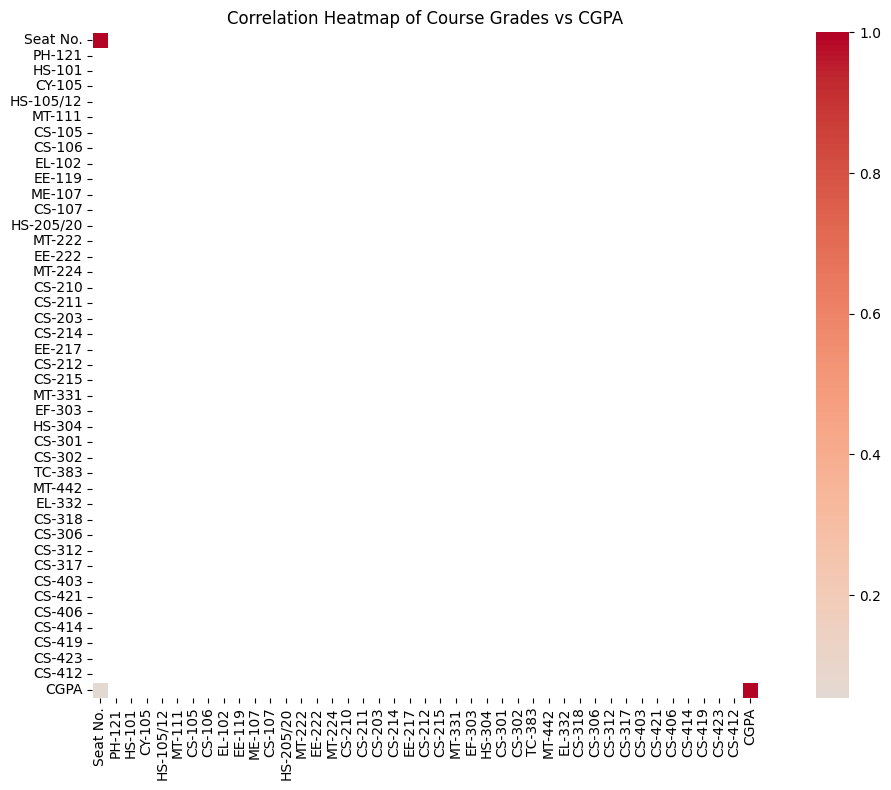

<Figure size 1200x600 with 0 Axes>

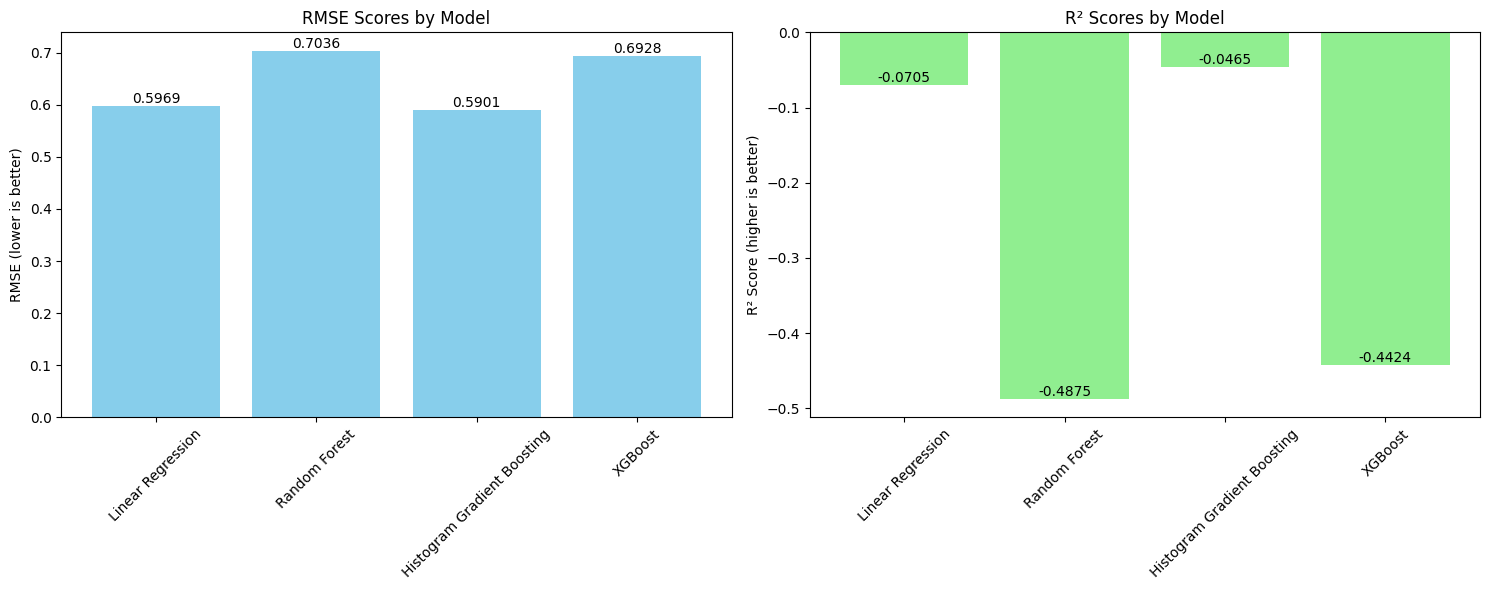

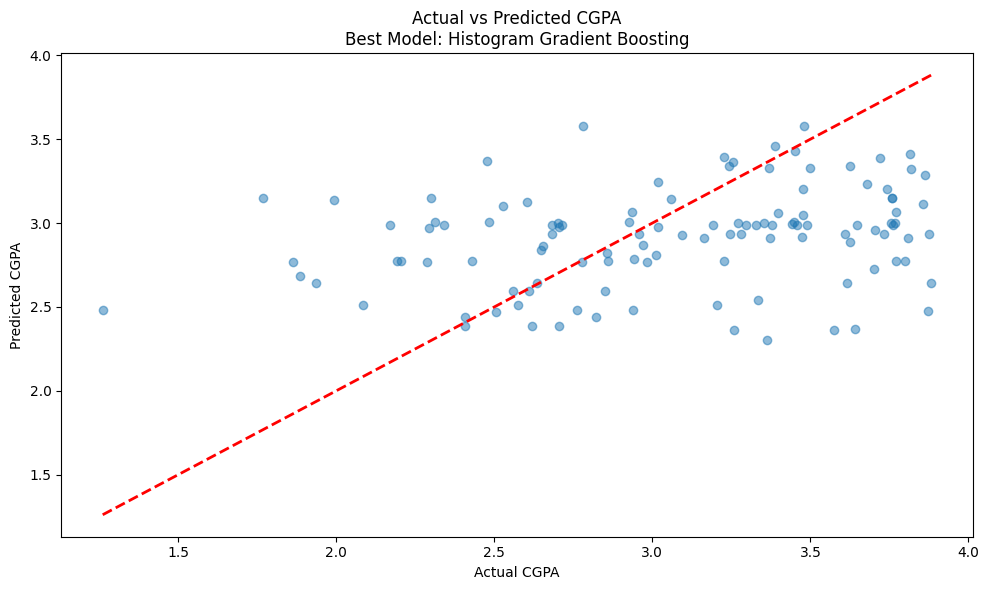

In [ ]:
# Creates visual representations of model performance and data relationships
# Helps in interpreting results and comparing model effectiveness
def create_visualizations(df, results):
    # Create numeric correlation matrix
    df_numeric = df.copy()

    # Convert string columns to numeric, excluding CGPA
    for column in df_numeric.columns:
        if column != 'CGPA' and df_numeric[column].dtype == 'object':
            df_numeric[column] = pd.to_numeric(df_numeric[column].str.extract('(\d+)')[0], errors='coerce')

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_numeric.corr()
    mask = np.triu(np.ones_like(correlation_matrix), k=1)
    sns.heatmap(correlation_matrix,
                mask=mask,
                cmap='coolwarm',
                center=0,
                annot=False,
                fmt='.2f',
                square=True,
                linewidths=0.5)
    plt.title('Correlation Heatmap of Course Grades vs CGPA')
    plt.tight_layout()
    plt.show()

    # Model Performance Comparison
    plt.figure(figsize=(12, 6))
    model_names = list(results.keys())
    rmse_scores = [results[name]['RMSE'] for name in model_names]
    r2_scores = [results[name]['R2'] for name in model_names]

    # Create bar plot
    x = np.arange(len(model_names))
    width = 0.35

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # RMSE Plot
    bars1 = ax1.bar(model_names, rmse_scores, color='skyblue')
    ax1.set_title('RMSE Scores by Model')
    ax1.set_ylabel('RMSE (lower is better)')
    ax1.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    # R2 Plot
    bars2 = ax2.bar(model_names, r2_scores, color='lightgreen')
    ax2.set_title('R² Scores by Model')
    ax2.set_ylabel('R² Score (higher is better)')
    ax2.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Additional visualization: Best Model Performance
    best_model_name = min(results.items(), key=lambda x: x[1]['RMSE'])[0]
    best_predictions = results[best_model_name]['predictions']

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, best_predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual CGPA')
    plt.ylabel('Predicted CGPA')
    plt.title(f'Actual vs Predicted CGPA\nBest Model: {best_model_name}')
    plt.tight_layout()
    plt.show()

# Add error handling
try:
    create_visualizations(df_processed, results)
except Exception as e:
    print(f"Error in visualization: {str(e)}")

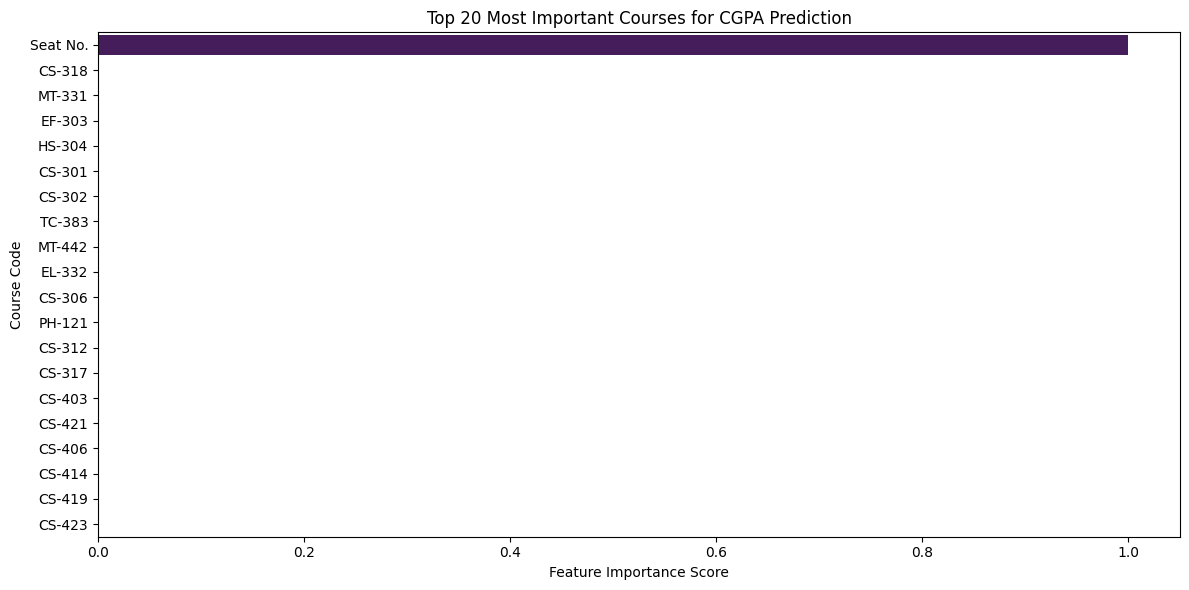


Top 10 Most Important Courses:
--------------------------------------------------
Rank  Course          Importance
--------------------------------------------------
1     Seat No.        1.000000
2     CS-318          0.000000
3     MT-331          0.000000
4     EF-303          0.000000
5     HS-304          0.000000
6     CS-301          0.000000
7     CS-302          0.000000
8     TC-383          0.000000
9     MT-442          0.000000
10    EL-332          0.000000

Feature Importance Summary:
--------------------------------------------------
Total courses analyzed: 42
Average importance: 0.023810
Median importance: 0.000000
Std deviation: 0.154303

Results saved to 'course_importance.csv'


In [ ]:
# Identifies most influential courses affecting CGPA
# Provides insights into which subjects have the strongest impact on final CGPA
def analyze_feature_importance(model, df):
    try:
        # Get feature names (excluding CGPA and Seat No)
        feature_names = df.drop(['CGPA', 'Seat No'], axis=1, errors='ignore').columns

        # Convert course codes to numeric if they're strings
        df_numeric = df.copy()
        for column in feature_names:
            if df_numeric[column].dtype == 'object':
                df_numeric[column] = pd.to_numeric(
                    df_numeric[column].str.extract('(\d+)')[0],
                    errors='coerce'
                )

        # Retrain the model with numeric data
        X = df_numeric[feature_names]
        y = df_numeric['CGPA']
        model.fit(X, y)

        # Get feature importances
        importances = model.feature_importances_

        # Create DataFrame with feature importances
        feature_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })

        # Sort by importance
        feature_imp = feature_imp.sort_values('Importance', ascending=False)

        # Visualization
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance',
                   y='Feature',
                   data=feature_imp.head(20),
                   palette='viridis')
        plt.title('Top 20 Most Important Courses for CGPA Prediction')
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Course Code')
        plt.tight_layout()
        plt.show()

        # Print top 10 features
        print("\nTop 10 Most Important Courses:")
        print("-" * 50)
        print("{:<5} {:<15} {:<10}".format("Rank", "Course", "Importance"))
        print("-" * 50)

        for idx, (feature, importance) in enumerate(
            zip(feature_imp['Feature'].head(10),
                feature_imp['Importance'].head(10))):
            print("{:<5d} {:<15} {:.6f}".format(
                idx + 1,
                feature,
                importance
            ))

        # Summary statistics
        print("\nFeature Importance Summary:")
        print("-" * 50)
        print(f"Total courses analyzed: {len(feature_names)}")
        print(f"Average importance: {feature_imp['Importance'].mean():.6f}")
        print(f"Median importance: {feature_imp['Importance'].median():.6f}")
        print(f"Std deviation: {feature_imp['Importance'].std():.6f}")

        return feature_imp

    except Exception as e:
        print(f"Error in feature importance analysis: {str(e)}")
        print("\nDebug information:")
        print(f"Number of features: {len(feature_names)}")
        print(f"Shape of importance array: {importances.shape if 'importances' in locals() else 'Not available'}")
        return None

# Execute the analysis with proper error handling
try:
    if 'Random Forest' in results:
        rf_model = results['Random Forest']['model']
        feature_importance_df = analyze_feature_importance(rf_model, df_processed)

        # Save results if available
        if feature_importance_df is not None:
            feature_importance_df.to_csv('course_importance.csv', index=False)
            print("\nResults saved to 'course_importance.csv'")
    else:
        print("Random Forest model not found in results")
except Exception as e:
    print(f"Error during analysis: {str(e)}")

In [ ]:
# Implements the final prediction functionality for new student data
# Allows practical application of the model for CGPA prediction
def predict_cgpa(model, new_data, scaler):
    """
    Predict CGPA for new student data
    """
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    return prediction[0]

# Usage Example:
# best_model = results['Random Forest']['model']
# new_student_data = pd.DataFrame(...)
# predicted_cgpa = predict_cgpa(best_model, new_student_data, scaler)